<a href="https://colab.research.google.com/github/sheetal-vartak/Will-the-Customer-Accept-the-Coupon/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
from google.colab import drive
drive.mount('/content/drive')

#create the DataFrame utilizing Pandas
coupons = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/coupons.csv")



Mounted at /content/drive


In [4]:
coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

I will rename the following columns as:
1. "passanger" -> "passenger"

Next, I will find the column values that are NaN.



In [5]:
coupons.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
coupons_clean = coupons.rename(columns={"passanger": "passenger"})

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
coupons_clean.isna().sum()

,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


The column "car" seems to have a huge number of NaN values.

In [8]:
coupons_clean["car"].value_counts()

,count
car,
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


let's see if there were any passengers who accepted with the value "do not drive" or "Car that is too old to install Onstar :D"

Based on below results, there are passengers who will accept even though they do not drive or cannot have Onstar.

So for the NaN values, we can ignore those since we cannot base acceptance of the coupon on the "car" column".


In [9]:
coupons_clean[(coupons_clean["car"] == "do not drive") | (coupons_clean["car"] == "Car that is too old to install Onstar :D")]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7305,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,0
7306,No Urgent Place,Friend(s),Sunny,80,10AM,Restaurant(<20),1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,1
7307,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,0
7308,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
7309,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,0
7310,No Urgent Place,Friend(s),Sunny,55,10AM,Coffee House,1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,0
7311,No Urgent Place,Friend(s),Sunny,55,6PM,Carry out & Take away,1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
7312,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,0
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
7314,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,0


For the "bar" column with NaN values, how many rows have accepted coupons?

Based on the following, there are 55 such entries out of about 107 NaN Bar values.

In [10]:
coupons_clean[(coupons_clean["Bar"].isna()) & (coupons_clean["Y"] == 1)]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
522,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
852,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
853,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
855,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
856,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
857,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
1166,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
1167,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,26,Unmarried partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1


We will fill out the NaN values with the mode value.

In [11]:
coupons_clean['Bar'] = coupons_clean['Bar'].fillna(coupons_clean['Bar'].mode()[0])
coupons_clean['CoffeeHouse'] = coupons_clean['CoffeeHouse'].fillna(coupons_clean['CoffeeHouse'].mode()[0])
coupons_clean['CarryAway'] = coupons_clean['CarryAway'].fillna(coupons_clean['CarryAway'].mode()[0])
coupons_clean['RestaurantLessThan20'] = coupons_clean['RestaurantLessThan20'].fillna(coupons_clean['RestaurantLessThan20'].mode()[0])
coupons_clean['Restaurant20To50'] = coupons_clean['Restaurant20To50'].fillna(coupons_clean['Restaurant20To50'].mode()[0])



4. What proportion of the total observations chose to accept the coupon?



In [12]:
count = coupons_clean["Y"].value_counts()
proportion = count[1] / (count[0] + count[1])
print("Proportion of the total observations that chose to accept the coupon = " , proportion)


Proportion of the total observations that chose to accept the coupon =  0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [13]:
px.bar(coupons_clean, x = "coupon")

6. Use a histogram to visualize the temperature column.

In [14]:
px.histogram(coupons_clean, x = "temperature")

If the coupon venue is in the same direction of where the passenger is heading, does it have an impact on coupon acceptance?

Interestingly, passengers have accepted coupons more number of times even when they were not going in the same direction as their destination.

In [15]:
coupons_clean.groupby("direction_same")["Y"].value_counts()

direction_same  Y
0               1    5624
                0    4336
1               1    1586
                0    1138
Name: count, dtype: int64

Will a passenger accept the coupon based on their personal status? Draw a plot to show.

In [16]:
px.bar(coupons_clean[coupons_clean["Y"] == 1], x = "maritalStatus")

Amongst the Single passengers, what coupons are they more likely to accept?

---



In [17]:
px.bar(coupons_clean[(coupons_clean["Y"] == 1) & (coupons_clean["maritalStatus"] == "Single")], x = "coupon")

Amongst the Married passengers, what coupons are they more likely to accept?


In [18]:
px.bar(coupons_clean[(coupons_clean["Y"] == 1) & (coupons_clean["maritalStatus"] == "Married partner")], x = "coupon")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


Text(0.5, 1.0, 'Bar Coupon distribution')

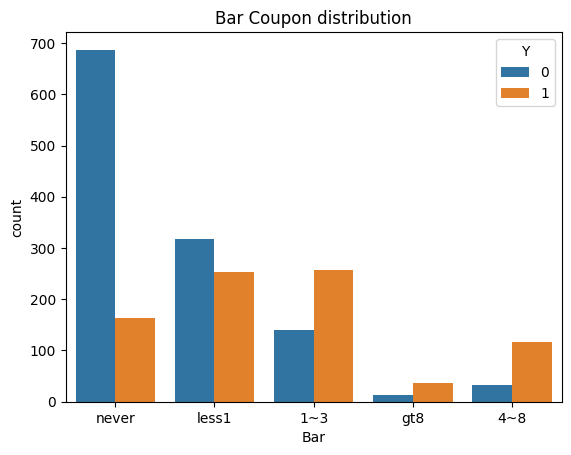

In [60]:
bar_coupons = coupons_clean[coupons_clean["coupon"] == "Bar"]
sns.countplot(x = "Bar", hue = "Y", data = bar_coupons).set_title("Bar Coupon distribution")

2. What proportion of bar coupons were accepted?


In [20]:
count = bar_coupons["Y"].value_counts()
proportion = count[1] / (count[0] + count[1])
print("Proportion of accepted bar coupons = " , proportion)


Proportion of accepted bar coupons =  0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar
1~3      257
4~8      117
gt8       36
less1    253
never    164
Name: count, dtype: int64
Bar coupon acceptance for passengers who go to bars less than 3 times =  674
Bar coupon acceptance for passengers who go to bars more than 3 times =  153
Bar coupon acceptance rate of passengers who go less than 3 times a month is  0.814993954050786


Text(0.5, 1.0, 'Accepted Bar coupon distribution')

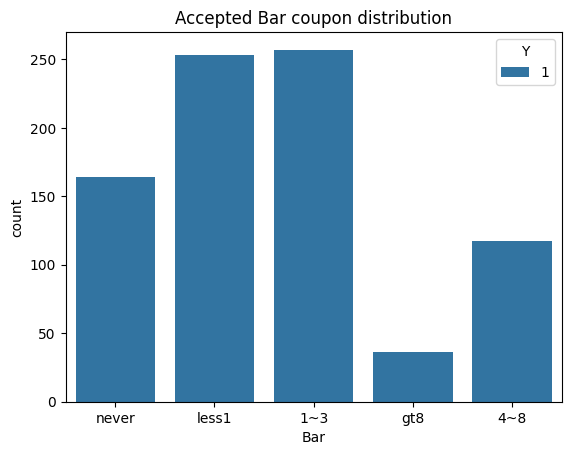

In [62]:
accepted_bar_coupons_count = bar_coupons[bar_coupons["Y"] == 1]

bar_counts = accepted_bar_coupons_count.groupby("Bar")["Bar"].value_counts()
print(bar_counts)

bar_less_than_three = ['never','less1','1~3']
acceptance_less_than_3 = accepted_bar_coupons_count.query('Bar in @bar_less_than_three').shape[0]
print("Bar coupon acceptance for passengers who go to bars less than 3 times = ",  + acceptance_less_than_3)


bar_more_than_three = ["4~8", "gt8"]
acceptance_more_than_3 = accepted_bar_coupons_count.query('Bar in @bar_more_than_three').shape[0]
print("Bar coupon acceptance for passengers who go to bars more than 3 times = ",  + acceptance_more_than_3)

print("Bar coupon acceptance rate of passengers who go less than 3 times a month is ", + acceptance_less_than_3 / (acceptance_less_than_3 + acceptance_more_than_3))

sns.countplot(x = "Bar", hue = "Y", data = accepted_bar_coupons_count).set_title("Accepted Bar coupon distribution")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Accepted Bar coupon distribution By Age')

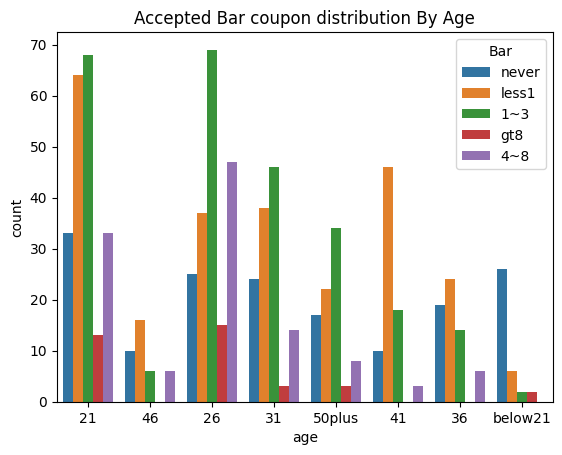

In [91]:
accepted_bar_coupons_count = bar_coupons[bar_coupons["Y"] == 1]
sns.countplot(x = "age", hue = "Bar", data = accepted_bar_coupons_count).set_title("Accepted Bar coupon distribution By Age")



acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 =  292


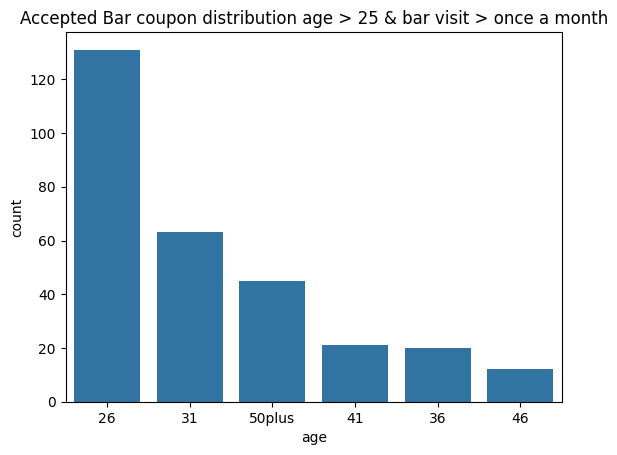

In [98]:
bar_more_than_once = ['1~3', '4~8', 'gt8']
age_greater_than_25 = ['26', '31', '50plus', '41', '36', '46']

query_count = accepted_bar_coupons_count.query("age in @age_greater_than_25 & Bar in @bar_more_than_once")
print("acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = ", query_count.shape[0])

sns.countplot(x = "age", data = query_count).set_title("Accepted Bar coupon distribution age > 25 & bar visit > once a month")
px.scatter(query_count, x = "age", y = "Bar", marginal_x = "histogram", marginal_y = "histogram", title = "Accepted Bar coupon distribution age > 25 & bar visit > once a month")

Age group of 21-25 and those who frequent the bar 1-3 times a month, seem to have accepted the maximum number of Bar coupons.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  